#Shinta Aulia Septiani - 1800015054



**Deteksi outlier menggunakan metode ESD Test**

In [42]:
#import dulu
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

In [43]:
%matplotlib inline

In [56]:
#input x dan y
y = np.random.random(200)
x = np.arange(len(y))

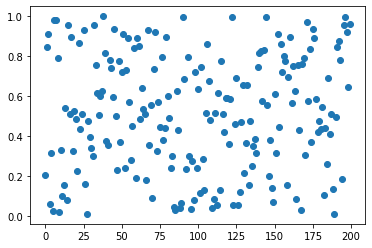

In [58]:
#buat scatterplot, untuk ngeliat penyebaran datanya
plt.scatter(x,y)

In [92]:
#coba masukin nilai-nilai yang outliner
#dengan mengambil nilai y yang lebih dari 1
#misalnya seperti ini
y[4] = -6
y[12] = 7
y[64] = 3
y[83] = 4
y[95] = 8
y[124] = 6
y[148] = 5
y[193] = 9

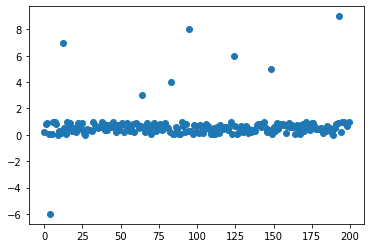

In [93]:
#buat scatterplot dulu
#terlihat titik-titik yang outliner
plt.scatter(x,y)

In [95]:
def G_Hitung(y):
    # Simpangan y
    std_dev = np.std(y)
    # Rata-rata y
    rata2_y = np.mean(y)
    # Nilai Mutlak selisih data dengan rata-rata
    selisih = abs(y-rata2_y)
    # Nilai Maksimal Selisih
    max_selisih=max(selisih)
    # Indeks Nilai Maksimal Selisih
    max_s_ind=np.argmax(selisih)
    # Menghitung GCAL
    Ghit=max_selisih/std_dev
    return Ghit, max_s_ind


In [96]:
def G_Tabel(ukuran, alpha):
    t_dist = stats.t.ppf(1 - alpha / (2 * ukuran), ukuran - 2)
    A = (ukuran - 1) * np.sqrt(np.square(t_dist))
    B = np.sqrt(ukuran) * np.sqrt(ukuran - 2 + np.square(t_dist))
    G_tabel = A / B
    return G_tabel


In [97]:
def ESD(y, alpha, n):
    outlier=[]
    for i in range(n):
        G_tabel=G_Tabel(len(y), alpha)
        Ghit, max_s_ind = G_Hitung(y)
        if Ghit>G_tabel:
          print("Ghit: {}".format(Ghit))
          print("G_Tabel: {}".format(G_tabel))
          print('Di y = {} outlier.\nKarena Ghit > G_tabel: {:.4f} > {:.4f} \n'.format(y[max_s_ind], Ghit, G_tabel))
          outlier.append(y[max_s_ind])
          y = np.delete(y, max_s_ind)
        else:
          print("Ghit: {}".format(Ghit))
          print("G_Tabel: {}".format(G_tabel))
          print('Di y = {} tidak outlier.\nKarena Ghit < G_tabel: {:.4f} < {:.4f} \n'.format(y[max_s_ind], Ghit, G_tabel))
    outlier=np.array(outlier)
    return outlier


In [98]:
#mencoba mencari dengan iterasi n = 10, dan alpha = 0.01

ESD(y, 0.01, 10)

Ghit: 6.892856186788404
G_Tabel: 3.977670232687403
Di y = 9.0 outlier.
Karena Ghit > G_tabel: 6.8929 > 3.9777 

Ghit: 6.972585294223002
G_Tabel: 3.9761787081025437
Di y = 8.0 outlier.
Karena Ghit > G_tabel: 6.9726 > 3.9762 

Ghit: 7.184062339811007
G_Tabel: 3.974678081786905
Di y = -6.0 outlier.
Karena Ghit > G_tabel: 7.1841 > 3.9747 

Ghit: 8.038504172239536
G_Tabel: 3.9731682483449284
Di y = 7.0 outlier.
Karena Ghit > G_tabel: 8.0385 > 3.9732 

Ghit: 8.304261514048228
G_Tabel: 3.971649100593429
Di y = 6.0 outlier.
Karena Ghit > G_tabel: 8.3043 > 3.9716 

Ghit: 8.446223337063225
G_Tabel: 3.9701205295169206
Di y = 5.0 outlier.
Karena Ghit > G_tabel: 8.4462 > 3.9701 

Ghit: 8.254303675452961
G_Tabel: 3.9685824242350325
Di y = 4.0 outlier.
Karena Ghit > G_tabel: 8.2543 > 3.9686 

Ghit: 7.31862134197939
G_Tabel: 3.9670346719505694
Di y = 3.0 outlier.
Karena Ghit > G_tabel: 7.3186 > 3.9670 

Ghit: 1.7797906038475955
G_Tabel: 3.965477157914488
Di y = 0.01283947371186056 tidak outlier.
Karen

array([ 9.,  8., -6.,  7.,  6.,  5.,  4.,  3.])